/home/norhther/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


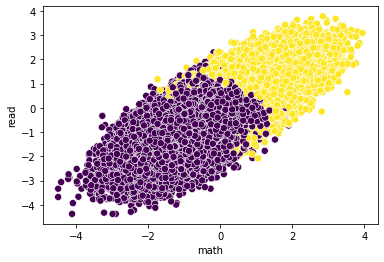

In [3]:
import time
from watchdog.observers import Observer
from watchdog.events import FileSystemEventHandler, PatternMatchingEventHandler
import duckdb
import pathlib
import pandas as pd
import numpy as np
conn_expl = duckdb.connect(database=str(pathlib.Path().resolve().parent) + '/exploitation/my-db.duckdb', read_only=False)

df = conn_expl.execute("SELECT * FROM dataset").df()
conn_expl.close()
df = df.drop(["year", "student_id", "school_id", "dishwasher", "year", "country_2", 
              "country_name", "country_3", "student_id", "escs", "wealth"], axis = 1)


from sklearn.preprocessing import StandardScaler

num_df = df.select_dtypes("number")
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_df)

num_df = pd.DataFrame(num_scaled, columns = list(num_df.columns))

from sklearn.cluster import KMeans
import seaborn as sns
kmeans = KMeans(n_clusters=2, random_state=42).fit_predict(num_df)

sns.scatterplot(num_df.iloc[:, 0], num_df.iloc[:, 1], c=kmeans, s=50, cmap='viridis');